In [1]:
 ## Introductionto packages
    ## This how to install packages

using LinearAlgebra, Statistics, Plots, LaTeXStrings

In [2]:
## Code to draw a random number from a standard normal distribution
   ## I've added the "@show" command to demonstrate how to see all of the outputs not just the last line
@show randn()
@show randn()

randn() = -0.2631758022253501
randn() = -0.7101195073615444


-0.7101195073615444

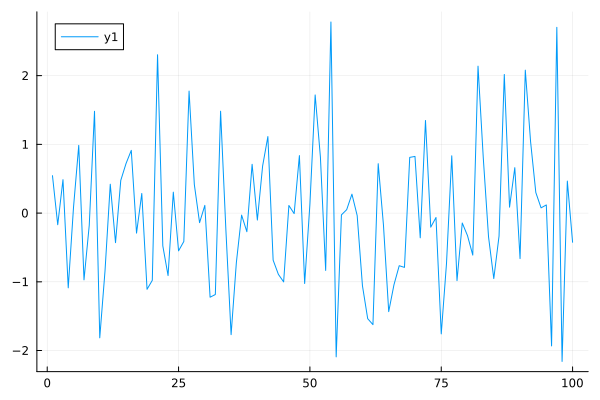

In [3]:
## How to use functionms from multiple packages
   ## 
n = 100
ep = randn(n)
plot(1:n, ep)

In [4]:
## Array

## To know what something is

@show typeof(ep)

## To get the first 5 elements of an array

@show ep[1:5]

typeof(ep) = Vector{Float64}
ep[1:5] = [0.5446228227904543, -0.16933018289953222, 0.4862674436202455, -1.087666749976815, 0.07924214062169982]


5-element Vector{Float64}:
  0.5446228227904543
 -0.16933018289953222
  0.4862674436202455
 -1.087666749976815
  0.07924214062169982

In [5]:
## Below shows how to get help on a command

In [6]:
?typeof

search: typeof typejoin TypeError



```
typeof(x)
```

Get the concrete type of `x`.

See also [`eltype`](@ref).

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Matrix{Float64} (alias for Array{Float64, 2})
```


In [7]:
## For loops

## Option 1 (poor style)
   ## How to convert an array of zeros to random draws from a standard normal distribution
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

ϵ[1:5]

## Option 2 (better style)
   ##
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

ϵ[1:5]

5-element Vector{Float64}:
  0.6827831095703774
  0.8220878113589004
 -0.47493175057282483
  1.9860928055065086
 -0.8635143011743658

In [8]:
## Loop for summing the first 5 ϵ values (from earlier) and taking the mean 
   ##
ϵ_sum = 0.0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
@show ϵ_mean = ϵ_sum / m

## Using built in function to calculate the mean
@show mean(ϵ[1:m])

ϵ_mean = ϵ_sum / m = 0.43050353493771915
mean(ϵ[1:m]) = 0.43050353493771915


0.43050353493771915

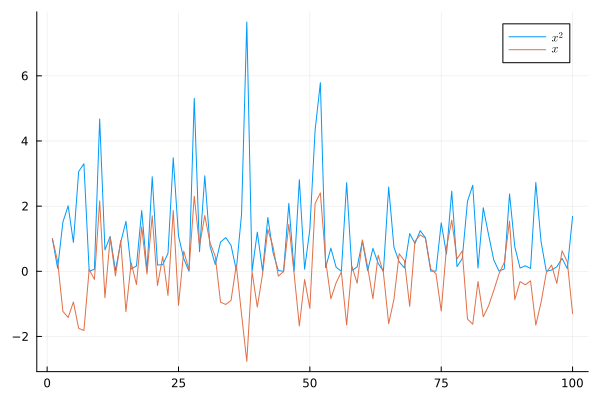

In [21]:
## User defined function
   ## Example how to generate random variables

## Option 1 (poor style)
   ##
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # Square the result
    end
    return ϵ
end

generatedata(100000)
plot(ϵ)


## Option 2 (still poor style)
   ##
function generatedata(n)
    ϵ = randn(n)
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end
data = generatedata(5)

## Option 3 (better style)
   ##
function generatedata(n)
    ϵ = randn(n) # use a built function
    return ϵ .^2
end
data = generatedata(5)

## Option 4 (good style) 
   ## no longer uses function
generatedata(n) = randn(n) .^2
data = generatedata(5)

## Option 5 (good style)
   ##
f(x) = x^2
generatedata(n) = f.(randn(n))
data = generatedata(5)

## Simplist
   ##
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = L"x^2") # the L operation tells it to use LaTeX
plot!(x, label = L"x") # layer on the same plot


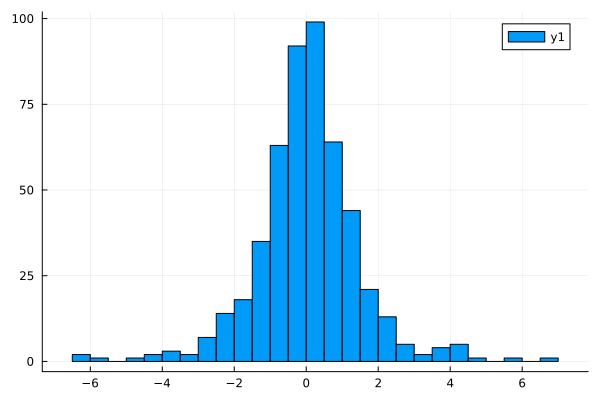

In [28]:
## Using the distributions package
   ##
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n) # n draws from a distribution
    histogram(ϵ)
end
lp = Laplace()
plothistogram(lp, 500)  

In [30]:
## Solving some more complicated math
   ##
ρ = 1.0 
β = 0.9

maxiter = 1000
tolerance = 1.0E-7
v_0 = 0.8 # initial condition

## Set up algorithim
   ##
v_old = v_0
normdiff = Inf
iter = 1

while normdiff > tolerance && iter <= maxiter
    v_new = ρ + β * v_old # this is the new f(v) map
    normdiff = norm(v_new - v_old)
    
    # replace the initial conditions
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old
    |f(x) - x| = $normdiff in $iter iterations") 

Fixed point = 9.999999173706609
    |f(x) - x| = 9.181037796679448e-8 in 155 iterations
